In [32]:
Train_path = "/content/drive/MyDrive/CovidDataset/Train"
Val_path = "/content/drive/MyDrive/CovidDataset/Val"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [4]:
# CNN based model in keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [6]:
# Train

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True # flipping to add more variation to the data and also fight overfitting
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/CovidDataset/Train",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 308 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [12]:
validation_generator = test_dataset.flow_from_directory(
    "/content/drive/MyDrive/CovidDataset/Val",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 84 images belonging to 2 classes.


In [13]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [15]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

<ipython-input-15-f543b772328c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 117s 15s/step - loss: 0.8222 - accuracy: 0.5164 - val_loss: 0.6770 - val_accuracy: 0.6250
Epoch 2/10
8/8 [==============================] - 79s 10s/step - loss: 0.5737 - accuracy: 0.7090 - val_loss: 0.4746 - val_accuracy: 0.8750
Epoch 3/10
8/8 [==============================] - 80s 10s/step - loss: 0.4373 - accuracy: 0.8279 - val_loss: 0.4931 - val_accuracy: 0.9219
Epoch 4/10
8/8 [==============================] - 71s 9s/step - loss: 0.3282 - accuracy: 0.8770 - val_loss: 0.2092 - val_accuracy: 0.9688
Epoch 5/10
8/8 [==============================] - 87s 10s/step - loss: 0.3212 - accuracy: 0.8730 - val_loss: 0.3750 - val_accuracy: 0.9688
Epoch 6/10
8/8 [==============================] - 98s 12s/step - loss: 0.2267 - accuracy: 0.9336 - val_loss: 0.1068 - val_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 89s 11s/step - loss: 0.2442 - accuracy: 0.9385 - val_loss: 0.1897 - val_accuracy: 0.9844
Epoch 8/10
8/8 [===========

As epoch increase we can see decrese in the loss and increase in the accuracy of both the training and calidation sets.

In [16]:
# Class Activation Maps
# Grad-CAM

model.save("model_adv.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model.evaluate_generator(train_generator)

<ipython-input-17-e4ade065aa26>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.20730790495872498, 0.951298713684082]

In [18]:
model.evaluate_generator(validation_generator)

<ipython-input-18-8951cfd684a1>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.1416293978691101, 0.976190447807312]

In [ ]:
# Plotting data

model = load_model('model_adv.h5')

In [22]:
import os

In [20]:
y_actual = []
y_test = []

In [25]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Normal/"):
  img = image.load_img("/content/drive/MyDrive/CovidDataset/Val/Normal/"+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  #p = model.predict_classes(img)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)

1/1 [==============================] - 0s 66ms/step


In [27]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Covid/"):
  img = image.load_img("/content/drive/MyDrive/CovidDataset/Val/Covid/"+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  #p = model.predict_classes(img)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)

1/1 [==============================] - 0s 104ms/step


In [28]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [30]:
cm = confusion_matrix(y_actual, y_test)

<Axes: >

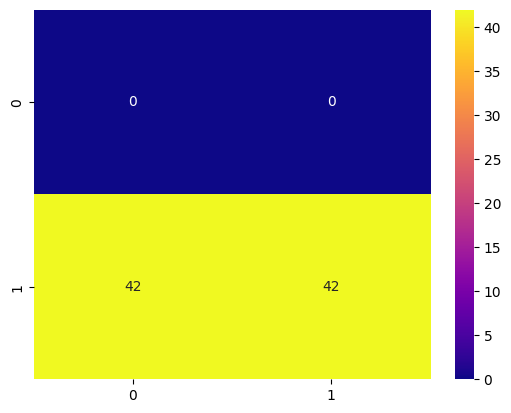

In [31]:
sns.heatmap(cm, cmap="plasma", annot=True)